<a href="https://colab.research.google.com/github/gtsagkatakis/ADAX-datathon/blob/main/MLP_PhotoZ_SDSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
# Direct download link from Zenodo
url = 'https://zenodo.org/records/11073039/files/PhotoZ_SDSS.csv'

# Download and load the dataset
data_raw = pd.read_csv(url)

# Display the first few rows of the dataframe
print(data_raw.head())


                 objid          ra        dec         u         g         r  \
0  1237657877538406672  116.120394  22.545785  24.56870  21.61409  22.12696   
1  1237663783144194772   46.998370  -0.830104  24.07251  20.66000  20.13897   
2  1237680529198940388  332.536372  25.377382  24.63465  22.93031  21.14673   
3  1237663547978744571  130.401203  58.256154  25.49103  23.31337  21.79658   
4  1237662666425827520  246.576703  24.555668  24.63449  18.96386  17.51325   

          i  photometric_z            specObjID      redshift  redshift_error  \
0  21.32540       21.38752  5032798515845419008  1.208629e-07        0.000119   
1  19.84265       19.68270   913172214314985472  1.267802e-07        0.000053   
2  19.94050       20.18146  6708185691363495936  2.121375e-07        0.000059   
3  20.59253       19.47360  9224594267057704960  4.250481e-07        0.000027   
4  16.66019       16.41736  1772187952164661248  4.440446e-07        0.000009   

    class  
0  GALAXY  
1  GALAXY  
2 

In [5]:
data = data_raw[(data_raw['u'] >= 0) & (data_raw['g'] >= 0) & (data_raw['r'] >= 0) & (data_raw['i'] >= 0) & (data_raw['photometric_z'] >= 0)]


# Display the first few rows of the DataFrame to confirm successful loading
print(data.head())


# Display summary statistics of the dataset
print(data.describe())

# Check for any missing values in the dataset
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna(subset=['u', 'g', 'r', 'i', 'photometric_z', 'redshift'])



                 objid          ra        dec         u         g         r  \
0  1237657877538406672  116.120394  22.545785  24.56870  21.61409  22.12696   
1  1237663783144194772   46.998370  -0.830104  24.07251  20.66000  20.13897   
2  1237680529198940388  332.536372  25.377382  24.63465  22.93031  21.14673   
3  1237663547978744571  130.401203  58.256154  25.49103  23.31337  21.79658   
4  1237662666425827520  246.576703  24.555668  24.63449  18.96386  17.51325   

          i  photometric_z            specObjID      redshift  redshift_error  \
0  21.32540       21.38752  5032798515845419008  1.208629e-07        0.000119   
1  19.84265       19.68270   913172214314985472  1.267802e-07        0.000053   
2  19.94050       20.18146  6708185691363495936  2.121375e-07        0.000059   
3  20.59253       19.47360  9224594267057704960  4.250481e-07        0.000027   
4  16.66019       16.41736  1772187952164661248  4.440446e-07        0.000009   

    class  
0  GALAXY  
1  GALAXY  
2 

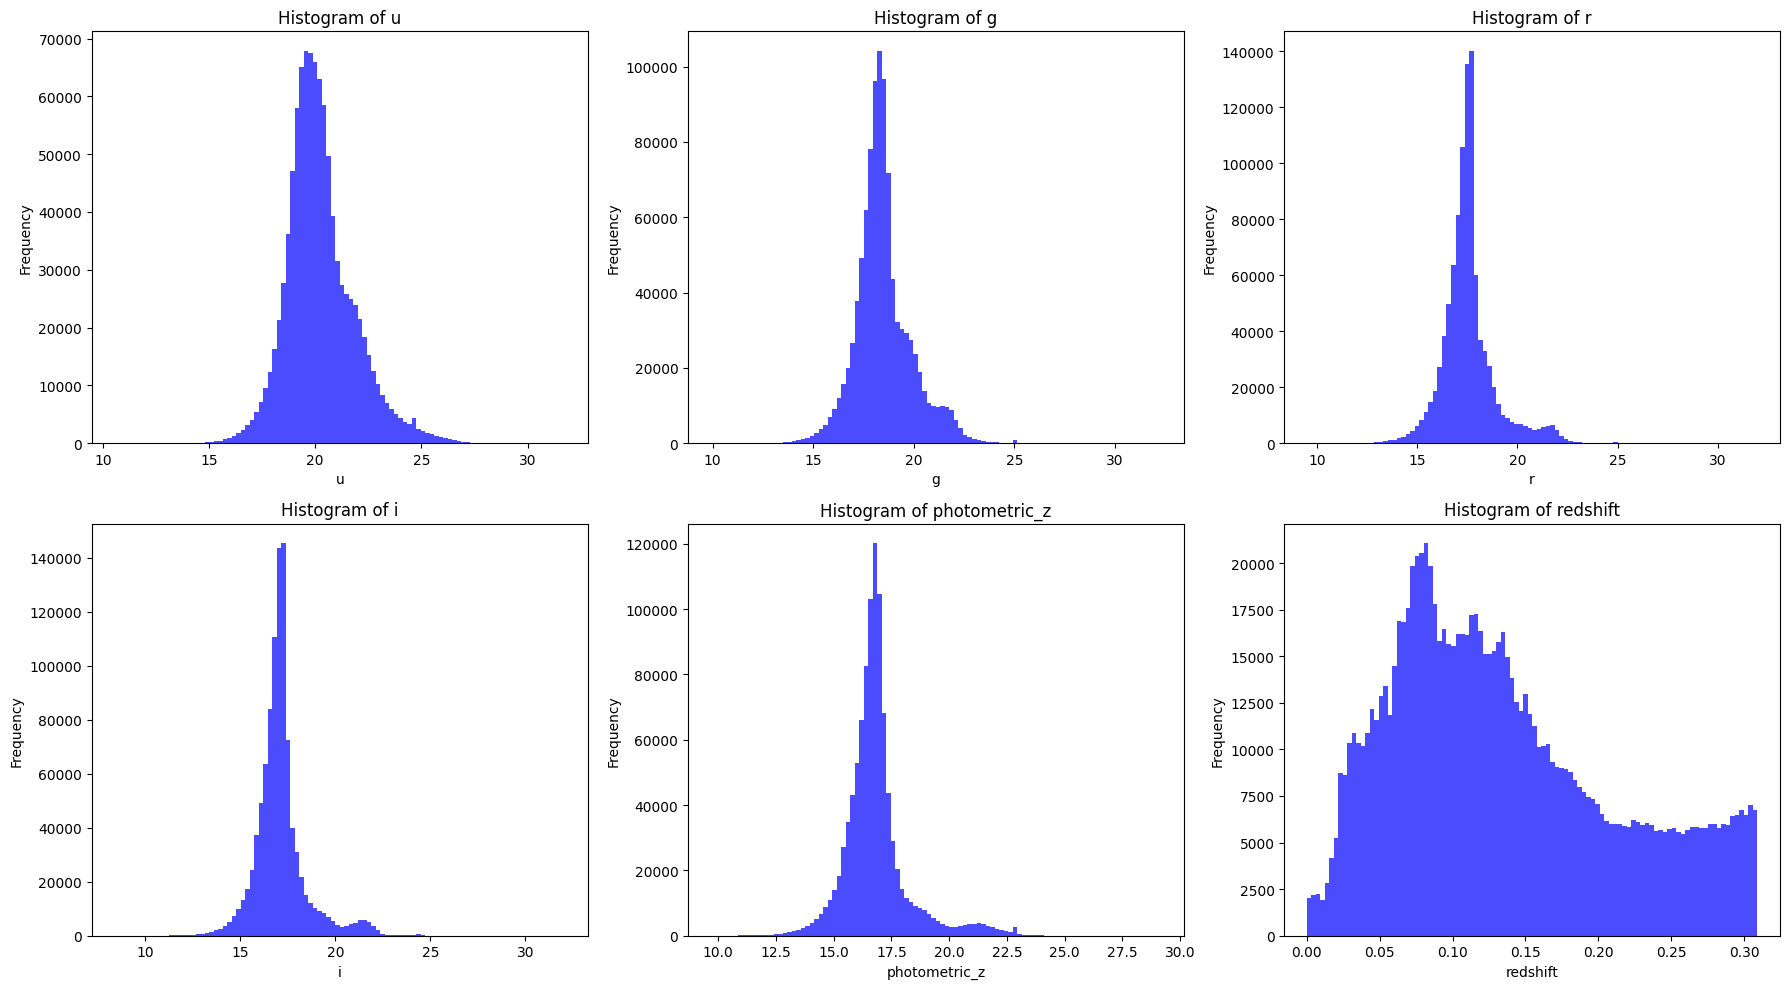

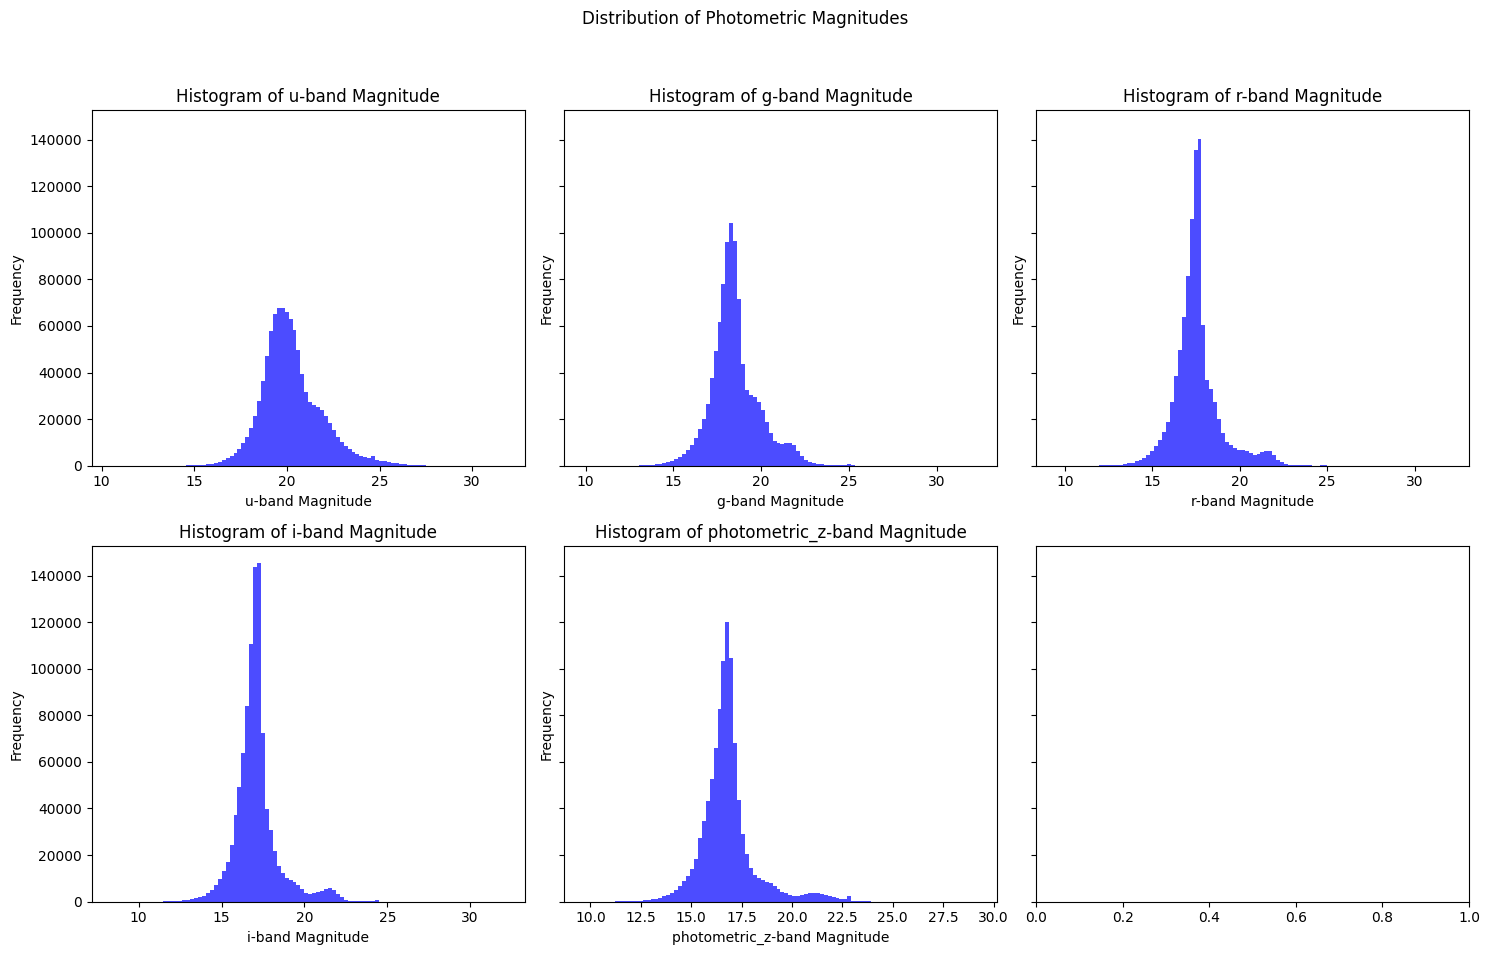

In [6]:

# Plotting the histogram of redshifts

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # Adjust subplot grid if needed
axes = axes.flatten()  # Flatten the axes array for easier iteration

# List of columns to plot
columns = ['u', 'g', 'r', 'i', 'photometric_z', 'redshift']

# Plotting histograms
for ax, column in zip(axes, columns):
    ax.hist(data[column].dropna().to_numpy(), bins=100, color='blue', alpha=0.7)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



# Plotting histograms for each photometric band
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharey=True)  # Shared y-axis for better comparison
fig.suptitle('Distribution of Photometric Magnitudes')

photometric_bands = ['u', 'g', 'r', 'i', 'photometric_z']
for ax, band in zip(axes.flatten(), photometric_bands):
    ax.hist(data[band].dropna().to_numpy(), bins=100, color='blue', alpha=0.7)  # Using dropna() to remove any NaN values that might cause issues
    ax.set_title(f'Histogram of {band}-band Magnitude')
    ax.set_xlabel(f'{band}-band Magnitude')
    ax.set_ylabel('Frequency')

# Adjust the layout to not overlap the subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Training set size: (799948, 5)
Testing set size: (199987, 5)
Epoch 1/10
625/625 [==============================] - 6s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0249 - mean_squared_error: 0.0014 - val_loss: 9.5815e-04 - val_mean_absolute_error: 0.0209 - val_mean_squared_error: 9.5815e-04
Epoch 2/10
625/625 [==============================] - 5s 9ms/step - loss: 9.8130e-04 - mean_absolute_error: 0.0211 - mean_squared_error: 9.8130e-04 - val_loss: 9.0876e-04 - val_mean_absolute_error: 0.0203 - val_mean_squared_error: 9.0876e-04
Epoch 3/10
625/625 [==============================] - 7s 11ms/step - loss: 9.3532e-04 - mean_absolute_error: 0.0206 - mean_squared_error: 9.3532e-04 - val_loss: 8.9283e-04 - val_mean_absolute_error: 0.0201 - val_mean_squared_error: 8.9283e-04
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 9.0412e-04 - mean_absolute_error: 0.0202 - mean_squared_error: 9.0412e-04 - val_loss: 8.6844e-04 - val_mean_absolute_error: 0.0198 - val_mean_squa

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6250/6250 - 9s - loss: 8.5506e-04 - mean_absolute_error: 0.0195 - mean_squared_error: 8.5506e-04 - 9s/epoch - 1ms/step
Loss (Mean Squared Error): 0.019496707245707512
Mean Absolute Error: 0.0008550620405003428


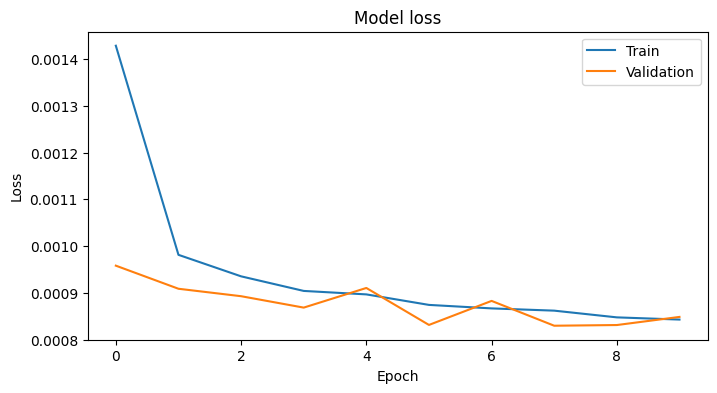

In [7]:


# Input
X = data[['u', 'g', 'r', 'i', 'photometric_z']]

# Target
y = data['redshift']



# Split the data - 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)




# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Define the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer: Predicting a single value
])

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error', 'mean_squared_error'])


# Fit the model on the training data
history = model.fit(X_train_scaled, y_train, batch_size=1024 , epochs=10, validation_split=0.2, verbose=1)

# Save the model if you need to use it later
model.save('my_redshift_model.h5')



6250/6250 - 10s - loss: 8.5506e-04 - mean_absolute_error: 0.0195 - mean_squared_error: 8.5506e-04 - 10s/epoch - 2ms/step
Loss (Mean Squared Error): 0.019496707245707512
Mean Absolute Error: 0.0008550620405003428


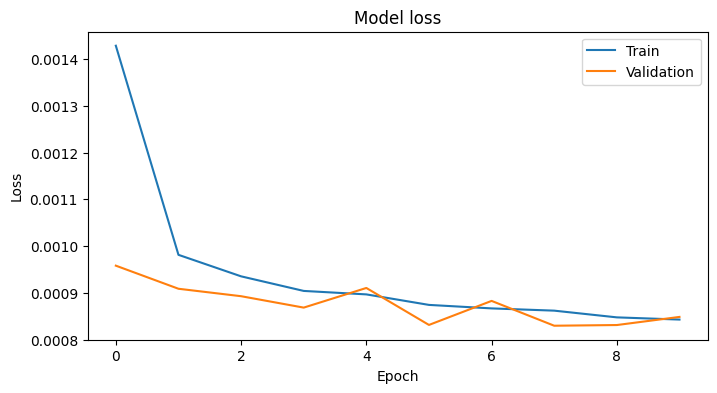

In [8]:

# Evaluate the model on the test set
test_results = model.evaluate(X_test_scaled, y_test, verbose=2)

# Print the loss and mean absolute error
print(f"Loss (Mean Squared Error): {test_results[1]}")
print(f"Mean Absolute Error: {test_results[2]}")

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()